In [45]:
import pandas as pd
import numpy as np


full_corpus = pd.read_csv("SMSSpamCollection.tsv",sep='\t',header=None)     #reading the dataset    
# full_corpus = pd.read_csv(r"C:\Users\rajat\Downloads\Ex_Files_NLP_Python_ML_EssT\Exercise Files\Ch01\01_03\Start\SMSSpamCollection.tsv",sep='\t',header=None)
# full_corpus = pd.read_csv("/workspaces/NLTK/SMSSpamCollection.tsv",sep = "\t", header=None)

In [46]:
full_corpus.head()

,0,1
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [47]:
full_corpus.columns = ["Label","Text"]
print(full_corpus.shape)
full_corpus.head()

(5568, 2)


,Label,Text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [48]:
print("Ham:{},Spam:{}".format(len(full_corpus[full_corpus['Label']=="ham"]),
                              len(full_corpus[full_corpus['Label']=='spam'])))
print("Number of NUlls in Label:{}".format(full_corpus['Label'].isnull().sum()))
print("Number of NUlls in Text:{}".format(full_corpus['Text'].isnull().sum()))

Ham:4822,Spam:746
Number of NUlls in Label:0
Number of NUlls in Text:0


In [49]:
pd.set_option("display.max_colwidth",100)

data = pd.read_csv("SMSSpamCollection.tsv",sep="\t",header = None)
data.columns = ['Label','Text']
data.head()

,Label,Text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [50]:
import nltk #Removing Stopwords
import re   #Tokenization
import string #Removing Punctuation


ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()
stopword = nltk.corpus.stopwords.words('english')

def clean_text(text):
    
    non_punct = "".join([char  for char in text if char not in string.punctuation])#Removing Punctuation
    tokens = re.split('\\W+',non_punct) #Tokenize
    wo_stopwords = [word for word in tokens if word not in stopword] #Removing Stopwords
    result = [ps.stem(word) for word in wo_stopwords] #Stemming
    # result = [wn.lemmatize(word) for word in wo_stopwords] #Lemmatizing
    return result


In [51]:
from sklearn.feature_extraction.text import CountVectorizer


count_vect = CountVectorizer(analyzer=clean_text)
X_countvectorizer = count_vect.fit_transform(data['Text'])
print(X_countvectorizer.shape)
print(count_vect.get_feature_names_out())

(5568, 8191)
['' '0' '008704050406' ... 'ü' 'üll' '〨ud']


In [52]:
# Using a data sample to see how the sparse matrix after count vectorization looks like

data_sample = data[0:20]

count_vect_sample = CountVectorizer(analyzer=clean_text)
X_vectors_sample = count_vect_sample.fit_transform(data_sample['Text'])
print(X_vectors_sample.shape)
print(count_vect_sample.get_feature_names_out())

(20, 220)
['08002986030' '08452810075over18' '09061701461' '1' '100' '100000' '11'
 '12' '150pday' '16' '2' '20000' '2005' '21st' '3' '4' '4403ldnw1a7rw18'
 '4txtú120' '6day' '81010' '87077' '87121' '87575' '9' '900' 'a' 'aft'
 'aid' 'alreadi' 'anymor' 'appli' 'ard' 'around' 'as' 'b' 'bless'
 'breather' 'brother' 'call' 'caller' 'callertun' 'camera' 'cash' 'chanc'
 'claim' 'click' 'co' 'code' 'colour' 'comin' 'comp' 'copi' 'cost'
 'credit' 'cri' 'csh11' 'cup' 'custom' 'da' 'date' 'dont' 'eg' 'eh'
 'england' 'enough' 'entitl' 'entri' 'even' 'fa' 'feel' 'final' 'fine'
 'finish' 'first' 'free' 'friend' 'from' 'fulfil' 'go' 'goalsteam' 'goe'
 'gonna' 'gota' 'grant' 'ha' 'had' 'have' 'he' 'help' 'hl' 'home' 'hour'
 'httpwap' 'i' 'im' 'info' 'is' 'ive' 'jackpot' 'joke' 'k' 'kim' 'kl341'
 'lar' 'latest' 'lccltd' 'like' 'link' 'live' 'lor' 'lunch' 'macedonia'
 'make' 'may' 'mell' 'membership' 'messag' 'minnaminungint' 'miss' 'mobil'
 'month' 'nah' 'name' 'nation' 'naughti' 'network' 'news' 'ne

In [53]:
X_vectors_sample

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 253 stored elements and shape (20, 220)>

In [54]:
X_vector_df = pd.DataFrame(X_vectors_sample.toarray())
X_vector_df

,0,1,2,3,4,5,6,7,8,9,...,210,211,212,213,214,215,216,217,218,219
0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [55]:
X_vector_df.columns = count_vect_sample.get_feature_names_out()
X_vector_df

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,16,...,wkli,wonder,wont,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,you,ü
0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [56]:
# N-gram Vectorization
def clean_text_ngram (text):
    text = "".join((word.lower() for word in text if word not in string.punctuation))
    tokens = re.split('\W+',text)
    text = " ".join([ps.stem(word) for word in tokens if word not in stopword]) # joined because n_gram works on string
    return text


data['cleaned_text_ngram'] = data['Text'].apply(lambda x: clean_text_ngram(x))
data.head()

,Label,Text,cleaned_text_ngram
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,ive search right word thank breather promis wont take help grant fulfil promis wonder bless time
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd...
2,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think goe usf live around though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even brother like speak treat like aid patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday


In [57]:
# Apply CountVectorizer(w/N-grams)
from sklearn.feature_extraction.text import CountVectorizer

ngram_vect = CountVectorizer(ngram_range=(2,2))
X_counts_ngram = ngram_vect.fit_transform(data['cleaned_text_ngram'])
print(X_counts_ngram.shape)
print(ngram_vect.get_feature_names_out())

(5568, 31275)
['008704050406 sp' '0089mi last' '0121 2025050' ... 'üll submit'
 'üll take' '〨ud even']


In [58]:
# Apply TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vect = TfidfVectorizer(analyzer=clean_text)
x_tfidf = tfidf_vect.fit_transform(data['Text'])
print(x_tfidf.shape)
print(tfidf_vect.get_feature_names_out())

(5568, 8191)
['' '0' '008704050406' ... 'ü' 'üll' '〨ud']


In [59]:
# Feature Engineering: Feature Creation
# Creating Feature for Text Message Length
data_new = pd.read_csv('SMSSpamCollection.tsv',sep='\t',header=None)
data_new.columns = ['Label','Text']
data_new['Body_len'] = data_new['Text'].apply(lambda x: len(x) - x.count(" "))
data_new.head()

,Label,Text,Body_len
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,160
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128
2,ham,"Nah I don't think he goes to usf, he lives around here though",49
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28


In [60]:
# Creating feature for % of Punctuation in Text

import string

data_new['% Punctuation'] = data_new['Text'].apply(lambda x: round(len([char for char in x if char in string.punctuation])/(len(x)-x.count(" ")),3)*100)
data_new.head()

,Label,Text,Body_len,% Punctuation
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


In [61]:
# Evaluating created features

from matplotlib import pyplot
import numpy as np
%matplotlib inline

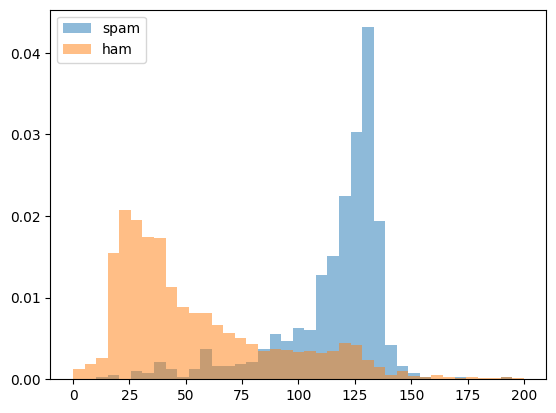

In [62]:
bins = np.linspace(0,200,40)

pyplot.hist(data_new[data_new['Label']=="spam"]['Body_len'],bins,density = True,alpha=0.5,label='spam')
pyplot.hist(data_new[data_new['Label']=="ham"]['Body_len'],bins,density = True,alpha=0.5,label='ham')
pyplot.legend(loc='upper left')
pyplot.show()


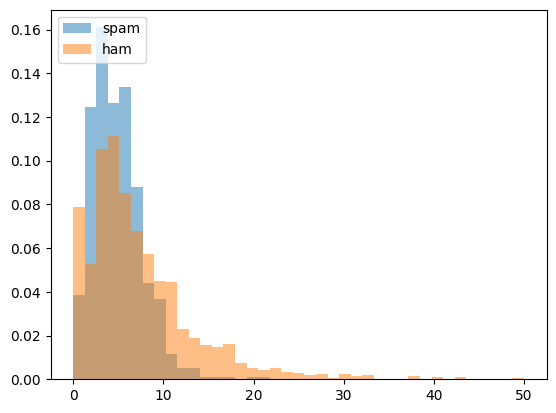

In [63]:
bins = np.linspace(0,50,40)

pyplot.hist(data_new[data_new['Label']=="spam"]['% Punctuation'],bins,density = True,alpha=0.5,label='spam')
pyplot.hist(data_new[data_new['Label']=="ham"]['% Punctuation'],bins,density = True,alpha=0.5,label='ham')
pyplot.legend(loc='upper left')
pyplot.show()

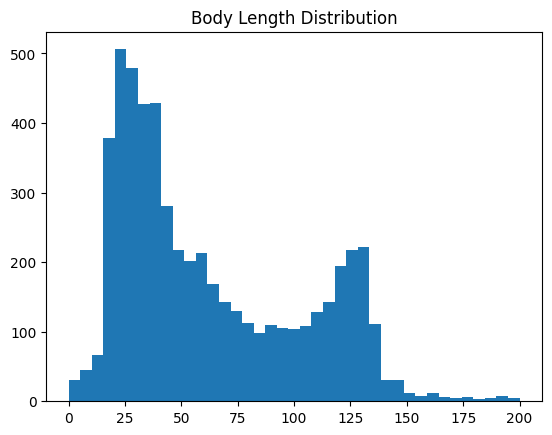

In [64]:
# Feature Engineering : Transformations
bins = np.linspace(0,200,40)
pyplot.hist(data_new['Body_len'],bins)
pyplot.title("Body Length Distribution")
pyplot.show()

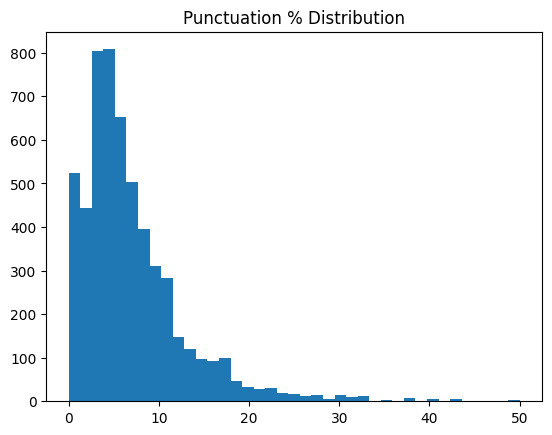

In [65]:

bins = np.linspace(0,50,40)
pyplot.hist(data_new['% Punctuation'],bins)
pyplot.title("Punctuation % Distribution")
pyplot.show()

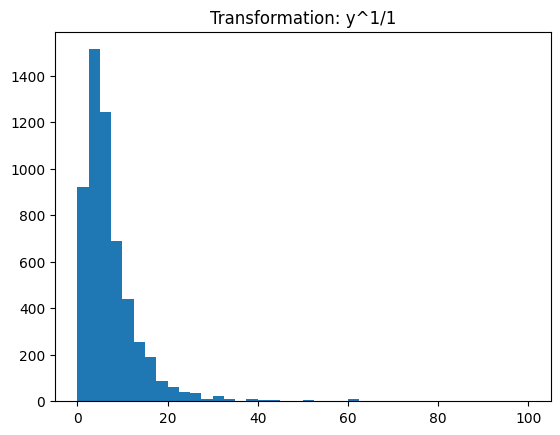

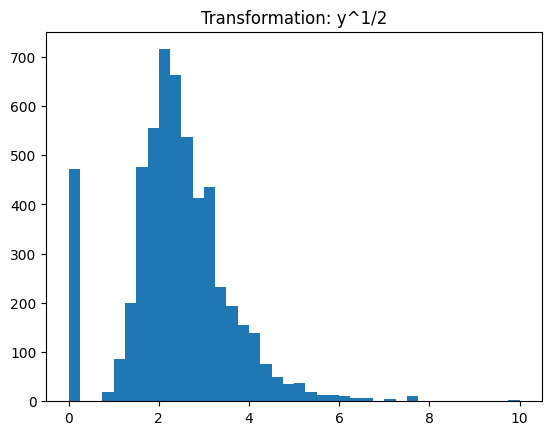

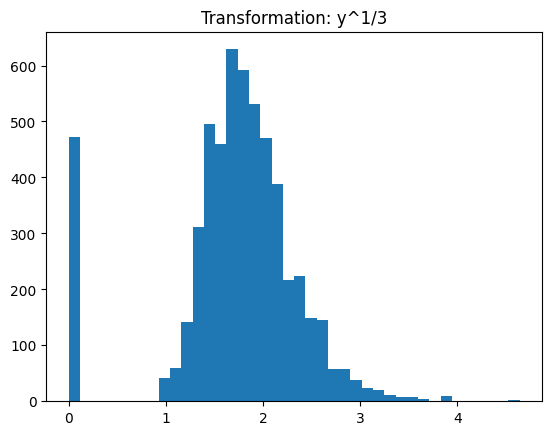

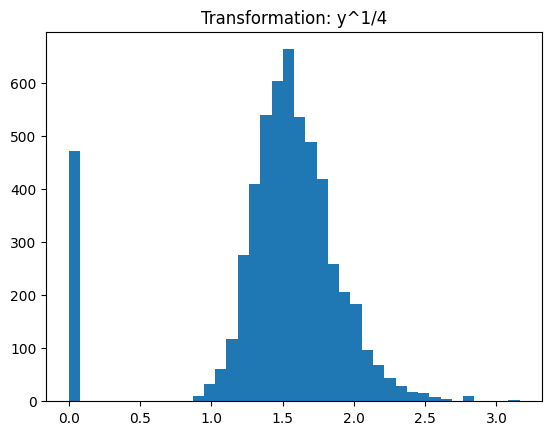

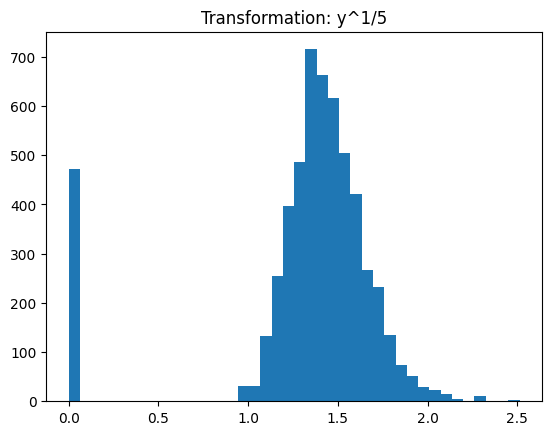

In [66]:
x = [1,2,3,4,5]

for i in x:
    pyplot.hist((data_new['% Punctuation'])**(1/i),bins=40)
    pyplot.title("Transformation: y^1/{}".format(str(i)))
    pyplot.show()